# Practica Final Mineria Francisco Calvo y Luis Morales


### Lectura de datos

Cargamos los csv que vamos a utilizar

In [48]:
import pandas as pd

archivo_csv = 'Data/kills.csv'
dfKills = pd.read_csv(archivo_csv)

archivo_csv = 'Data/monsters.csv'
dfMonsters = pd.read_csv(archivo_csv)

archivo_csv = 'Data/structures.csv'
dfStructures = pd.read_csv(archivo_csv)

archivo_csv = 'Data/LeagueofLegends.csv'
dfLeagueofLegends = pd.read_csv(archivo_csv)

Observamos las columnas que hay en la tabla principal

In [49]:
dfLeagueofLegends.columns

Index(['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult',
       'redTeamTag', 'gamelength', 'golddiff', 'goldblue', 'bKills', 'bTowers',
       'bInhibs', 'bDragons', 'bBarons', 'bHeralds', 'goldred', 'rKills',
       'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds', 'blueTop',
       'blueTopChamp', 'goldblueTop', 'blueJungle', 'blueJungleChamp',
       'goldblueJungle', 'blueMiddle', 'blueMiddleChamp', 'goldblueMiddle',
       'blueADC', 'blueADCChamp', 'goldblueADC', 'blueSupport',
       'blueSupportChamp', 'goldblueSupport', 'blueBans', 'redTop',
       'redTopChamp', 'goldredTop', 'redJungle', 'redJungleChamp',
       'goldredJungle', 'redMiddle', 'redMiddleChamp', 'goldredMiddle',
       'redADC', 'redADCChamp', 'goldredADC', 'redSupport', 'redSupportChamp',
       'goldredSupport', 'redBans', 'Address'],
      dtype='object')

Podemos observar que hay columnas que son int y otras que son objetos, los cuales en la mayoria de los casos son listas de enteros representando dicho valor en cada minuto de la partida

In [50]:
dfLeagueofLegends.dtypes

League              object
Year                 int64
Season              object
Type                object
blueTeamTag         object
bResult              int64
rResult              int64
redTeamTag          object
gamelength           int64
golddiff            object
goldblue            object
bKills              object
bTowers             object
bInhibs             object
bDragons            object
bBarons             object
bHeralds            object
goldred             object
rKills              object
rTowers             object
rInhibs             object
rDragons            object
rBarons             object
rHeralds            object
blueTop             object
blueTopChamp        object
goldblueTop         object
blueJungle          object
blueJungleChamp     object
goldblueJungle      object
blueMiddle          object
blueMiddleChamp     object
goldblueMiddle      object
blueADC             object
blueADCChamp        object
goldblueADC         object
blueSupport         object
b

### Estudio de los datos

Hemos realizado distintas funciones para observar datos de nuestro dataset, aunque realizandolo de la manera en la que mostramos tienen una ejecución muy larga, llegando a los 20 minutos, lo que hicimos fue preparar unos mapReduce para mostrar como se haría y si necesitamos ejecutarlo en Apache Spark 

In [73]:
# Campeones con mas winrate
champs = {}
winrate2 = dfMarchinfo.copy()
winrate = {}
# Define tu función
def mi_funcion(row):
    blue_columns = ['blueTopChamp', 'blueJungleChamp', 'blueMiddleChamp', 'blueADCChamp', 'blueSupportChamp']
    red_columns = ['redTopChamp', 'redJungleChamp', 'redMiddleChamp', 'redADCChamp', 'redSupportChamp']

    for col in blue_columns:
        if row[col] in champs:
            champs[row[col]] += 1
            if row['bResult'] == 1:
                if row[col] in winrate:
                    winrate[row[col]] += 1
                else:
                    winrate[row[col]] = 1
        else:
            champs[row[col]] = 1

    for col in red_columns:
        if row[col] in champs:
            champs[row[col]] += 1
            if row['rResult'] == 1:
                if row[col] in winrate:
                    winrate[row[col]] += 1
                else:
                    winrate[row[col]] = 1
        else:
            champs[row[col]] = 1

# Aplica la función a todas las filas utilizando apply()
winrate2.apply(mi_funcion, axis=1)
winrate

{'Irelia': 228,
 'Rengar': 320,
 'Fizz': 181,
 'Sivir': 883,
 'Annie': 148,
 'Gnar': 646,
 'Janna': 464,
 'JarvanIV': 600,
 'Lulu': 640,
 'Corki': 851,
 'Thresh': 1005,
 'Renekton': 290,
 'Azir': 492,
 'Caitlyn': 565,
 'Kassadin': 213,
 'Orianna': 629,
 'Nami': 295,
 'Morgana': 314,
 'Graves': 672,
 'Vi': 42,
 'Lissandra': 291,
 'Sion': 64,
 'Kalista': 712,
 'Blitzcrank': 112,
 'Leblanc': 432,
 'Rumble': 571,
 'Zed': 203,
 'Maokai': 947,
 'LeeSin': 686,
 'Xerath': 60,
 'Tristana': 424,
 'KogMaw': 276,
 'Ahri': 341,
 'RekSai': 1125,
 'Jinx': 117,
 'Ezreal': 695,
 'Jax': 111,
 'Nidalee': 418,
 'Leona': 76,
 'Nunu': 78,
 'Braum': 1023,
 'Veigar': 19,
 'Hecarim': 200,
 'Kennen': 197,
 'Sejuani': 291,
 'Karthus': 20,
 'Yasuo': 52,
 'Lucian': 841,
 'Gragas': 1339,
 'Vayne': 101,
 'Nautilus': 569,
 'Urgot': 54,
 'Zac': 177,
 'Chogath': 167,
 'Vladimir': 299,
 'Draven': 31,
 'Cassiopeia': 485,
 'Alistar': 799,
 'Viktor': 545,
 'Malphite': 72,
 'Varus': 769,
 'Ryze': 444,
 'Bard': 354,
 'Ekko':

In [53]:
# Crear el DataFrame a partir de los diccionarios y transponerlo
df = pd.DataFrame([champs, winrate]).T

# Renombrar las columnas
df.columns = ['picks', 'wins']
df['winrate'] = df['wins'] / (df['picks']) * 100
df.fillna(0, inplace=True)
df.sort_values('picks', ascending=False, inplace=True)
print(df)

               picks    wins    winrate
Gragas        2555.0  1339.0  52.407045
RekSai        2330.0  1125.0  48.283262
Braum         2115.0  1023.0  48.368794
Elise         2065.0  1044.0  50.556901
Thresh        1923.0  1005.0  52.262090
...              ...     ...        ...
MonkeyKing       4.0     1.0  25.000000
Volibear         4.0     0.0   0.000000
Garen            2.0     0.0   0.000000
FiddleSticks     2.0     1.0  50.000000
Tryndamere       1.0     0.0   0.000000

[140 rows x 3 columns]


In [54]:
df_bans = dfBans.copy()
bans = {}
def contar_bans(x):
    for i in range(1, 6):  # Itera sobre los números de las columnas
        ban_col = f'ban_{i}'  # Nombre de la columna
        if not pd.isnull(x[ban_col]):  # Verifica si el valor no es NaN
            if x[ban_col] in bans:
                bans[x[ban_col]] += 1
            else:
                bans[x[ban_col]] = 1

df_bans.apply(contar_bans, axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
15235    None
15236    None
15237    None
15238    None
15239    None
Length: 15240, dtype: object

In [55]:
# Crear el DataFrame a partir de los diccionarios y transponerlo
dfB = pd.DataFrame([bans]).T

# Renombrar las columnas
dfB.columns = ['bans']
dfB['banratio'] = dfB['bans'] / 7621 * 100
dfB.sort_values('banratio', ascending=False, inplace=True)
print(dfB)

              bans   banratio
Leblanc       2477  32.502296
Kalista       1959  25.705288
Ryze          1896  24.878625
Elise         1577  20.692822
Shen          1571  20.614093
...            ...        ...
FiddleSticks     2   0.026243
Fiddlesticks     2   0.026243
Garen            2   0.026243
Amumu            1   0.013122
Volibear         1   0.013122

[137 rows x 2 columns]


In [56]:
result2 = pd.merge(df, dfB, left_index=True, right_index=True)
result2_reset_index = result2.reset_index()
result2

,picks,wins,winrate,bans,banratio
Gragas,2555.0,1339.0,52.407045,956,12.544286
RekSai,2330.0,1125.0,48.283262,966,12.675502
Braum,2115.0,1023.0,48.368794,618,8.109172
Elise,2065.0,1044.0,50.556901,1577,20.692822
Thresh,1923.0,1005.0,52.262090,1140,14.958667
...,...,...,...,...,...
Heimerdinger,6.0,3.0,50.000000,4,0.052487
MasterYi,6.0,2.0,33.333333,4,0.052487
Volibear,4.0,0.0,0.000000,1,0.013122
Garen,2.0,0.0,0.000000,2,0.026243


In [57]:
import plotly.express as px
result2 = result2.head(10)
fig = px.scatter_3d(result2,
      x='picks',
      y ='wins',
      z= 'bans',
      color = result2.index
)
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
import matplotlib.pyplot as plt

p_df = df.head(10)
p_df = p_df['winrate']
p_df
# Crea el gráfico de barras horizontal
plt.barh(p_df.index, p_df, color='skyblue')
plt.xlabel('Valor')
plt.ylabel('Indice')
plt.title('Gráfico de Barras Horizontal con una sola columna')
plt.show()

In [ ]:
# Campeones con mas winrate
s = {}
winrate3 = dfMarchinfo.copy()
winrate_players = {}
# Define tu función
def mi_funcion(row):
        if row['blueTop'] in s: # No esta en el resgistros de campeones
            s[row['blueTop']] += 1
            if row['bResult'] == 1: # Si ganaron
                if row['blueTop'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['blueTop']] += 1
                else:
                    winrate_players[row['blueTop']] = 1
        else:
            s[row['blueTop']] = 1

        if row['blueJungle'] in s: # No esta en el resgistros de campeones
            s[row['blueJungle']] += 1
            if row['bResult'] == 1: # Si ganaron
                if row['blueJungle'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['blueJungle']] += 1
                else:
                    winrate_players[row['blueJungle']] = 1
        else:
            s[row['blueJungle']] = 1

        if row['blueMiddle'] in s: # No esta en el resgistros de campeones
            s[row['blueMiddle']] += 1
            if row['bResult'] == 1: # Si ganaron
                if row['blueMiddle'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['blueMiddle']] += 1
                else:
                    winrate_players[row['blueMiddle']] = 1
        else:
            s[row['blueMiddle']] = 1

        if row['blueADC'] in s: # No esta en el resgistros de campeones
            s[row['blueADC']] += 1
            if row['bResult'] == 1: # Si ganaron
                if row['blueADC'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['blueADC']] += 1
                else:
                    winrate_players[row['blueADC']] = 1
        else:
            s[row['blueADC']] = 1

        if row['blueSupport'] in s: # No esta en el resgistros de campeones
            s[row['blueSupport']] += 1
            if row['bResult'] == 1: # Si ganaron
                if row['blueSupport'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['blueSupport']] += 1
                else:
                    winrate_players[row['blueSupport']] = 1
        else:
            s[row['blueSupport']] = 1

        if row['redTop'] in s: # No esta en el resgistros de campeones
            s[row['redTop']] += 1
            if row['rResult'] == 1: # Si ganaron
                if row['redTop'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['redTop']] += 1
                else:
                    winrate_players[row['redTop']] = 1
        else:
            s[row['redTop']] = 1

        if row['redJungle'] in s: # No esta en el resgistros de campeones
            s[row['redJungle']] += 1
            if row['rResult'] == 1: # Si ganaron
                if row['redJungle'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['redJungle']] += 1
                else:
                    winrate_players[row['redJungle']] = 1
        else:
            s[row['redJungle']] = 1

        if row['redMiddle'] in s: # No esta en el resgistros de campeones
            s[row['redMiddle']] += 1
            if row['rResult'] == 1: # Si ganaron
                if row['redMiddle'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['redMiddle']] += 1
                else:
                    winrate_players[row['redMiddle']] = 1
        else:
            s[row['redMiddle']] = 1

        if row['redADC'] in s: # No esta en el resgistros de campeones
            s[row['redADC']] += 1
            if row['rResult'] == 1: # Si ganaron
                if row['redADC'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['redADC']] += 1
                else:
                    winrate_players[row['redADC']] = 1
        else:
            s[row['redADC']] = 1

        if row['redSupport'] in s: # No esta en el resgistros de campeones
            s[row['redSupport']] += 1
            if row['rResult'] == 1: # Si ganaron
                if row['redSupport'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['redSupport']] += 1
                else:
                    winrate_players[row['redSupport']] = 1
        else:
            s[row['redSupport']] = 1

# Aplica la función a todas las filas utilizando apply()
winrate3.apply(mi_funcion, axis=1)

In [ ]:
# Crear el DataFrame a partir de los diccionarios y transponerlo
df2 = pd.DataFrame([s, winrate_players]).T


# Renombrar las columnas
df2.columns = ['partidos', 'wins']

df2['winrate'] = df2['wins'] / df2['partidos'] * 100
df2.fillna(0, inplace=True)
df2.sort_values('winrate', ascending=False, inplace=True)

print(df2)

Uno de los ejemplos de como se haría un MapReduce

In [ ]:
from mrjob.job import MRJob
import pandas as pd

class MyMRJob(MRJob):

    def mapper(self, _, line):
        row = pd.read_csv('Data/matchinfo.csv')
        results = {}

        for col in ['blueTop', 'blueJungle', 'blueMiddle', 'blueADC', 'blueSupport',
                    'redTop', 'redJungle', 'redMiddle', 'redADC', 'redSupport']:
            if row[col] in results:
                results[row[col]] += 1
            else:
                results[row[col]] = 1

        yield None, results

    def reducer(self, _, results):
        total_result = {}
        for result in results:
            for champ, count in result.items():
                if champ in total_result:
                    total_result[champ] += count
                else:
                    total_result[champ] = count
        yield None, total_result

if __name__ == '__main__':
    MyMRJob.run()


usage: ipykernel_launcher.py [options] [input files]
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

C:\Users\franc\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Preprocesado

Hacemos una copia de la tabla principal, la cual iremos procesando y añadiendo las columnas que hagamos. Teniendo en cuenta que el objetivo es determinar quien ganaria teniendo los datos al minuto 15.

In [ ]:
df15 = dfLeagueofLegends.copy()

#### Torres tiradas toplane, botlane, midlane y inibidores

Hemos decidido unificar los tipos de torre a la linea en la que se encuentran, partiendo de la tabla de estructuras filtramos por tiempo y agrupamos por partido,equipo y linea y contamos. Provocando que tengamos por cada partido el numero de torres que se tiro en cada linea antes del 15. Despues antes de añadir, hiniciamos los valores a 0 para evinar Nan 

In [ ]:
df_t_pos = dfStructures.copy()
df_t_pos = df_t_pos[df_t_pos['Time'] < 15]
df_t_pos.drop('Time', inplace=True, axis=1)

df_t_pos = df_t_pos.groupby(['Address','Team','Lane']).count().reset_index()
print(df_t_pos.head())

In [ ]:
df15['bTopTowers'] = 0
df15['bMiddleTowers'] = 0
df15['bBotTowers'] = 0

df15['redTopTowers'] = 0
df15['redMiddleTowers'] = 0
df15['redBotTowers'] = 0

def recorrer(row):   
    aux = df_t_pos[df_t_pos['Address']==row['Address']]
    if not aux.empty:
        for index, row2 in aux.iterrows():
            v = row2['Type']
            if row2['Team'] == 'bTowers':
                if row2['Lane'] == 'TOP_LANE':
                    row['bTopTowers'] = v
                if row2['Lane'] == 'MID_LANE':
                    row['bMiddleTowers'] = v
                if row2['Lane'] == 'BOT_LANE':
                    row['bBotTowers'] = v
            else:
                if row2['Lane'] == 'TOP_LANE':
                    row['redTopTowers'] = v
                if row2['Lane'] == 'MID_LANE':
                    row['redMiddleTowers'] = v
                if row2['Lane'] == 'BOT_LANE':
                    row['redBotTowers'] = v
    return row
    
    
df15 = df15.apply(recorrer, axis=1)
df15.head()  
    

#### Filtrar oro a min 15

Existen numerosas columnas que son listas de enteros, que representan el oro en cada minuto de la partida, por ello nos quedamos con el 15 valor del array de cada columna del oro.

In [ ]:
def string_a_int_array(s):
    # Removemos los corchetes al principio y al final
    s = s.strip('[]')
    # Dividimos los valores por las comas y eliminamos los espacios en blanco alrededor de cada valor
    valores = [int(valor.strip()) for valor in s.split(',')]
    return valores

df15['golddiff'] = df15['golddiff'].map(lambda x: string_a_int_array(x)[15])
df15['goldblue'] = df15['goldblue'].map(lambda x: string_a_int_array(x)[15])
df15['goldred'] = df15['goldred'].map(lambda x: string_a_int_array(x)[15])

df15['goldblueADC'] = df15['goldblueADC'].map(lambda x: string_a_int_array(x)[15])
df15['goldredJungle'] = df15['goldredJungle'].map(lambda x: string_a_int_array(x)[15])
df15['goldblueSupport'] = df15['goldblueSupport'].map(lambda x: string_a_int_array(x)[15])
df15['goldblueTop'] = df15['goldblueTop'].map(lambda x: string_a_int_array(x)[15])
df15['goldblueMiddle'] = df15['goldblueMiddle'].map(lambda x: string_a_int_array(x)[15])

df15['goldredADC'] = df15['goldredADC'].map(lambda x: string_a_int_array(x)[15])
df15['goldredSupport'] = df15['goldredSupport'].map(lambda x: string_a_int_array(x)[15])
df15['goldredTop'] = df15['goldredTop'].map(lambda x: string_a_int_array(x)[15])
df15['goldredMiddle'] = df15['goldredMiddle'].map(lambda x: string_a_int_array(x)[15])
df15['goldblueJungle'] = df15['goldblueJungle'].map(lambda x: string_a_int_array(x)[15])

df15 = df15.rename(columns={'golddiff': 'golddiff15', 'goldblue': 'goldblue15', 'goldred': 'goldred15', 'goldblueADC': 'goldblueADC15', 'goldredJungle': 'goldredJungle15', 'goldblueSupport': 'goldblueSupport15', 'goldblueTop': 'goldblueTop15', 'goldblueMiddle': 'goldblueMiddle15', 'goldredADC': 'goldredADC15', 'goldredSupport': 'goldredSupport15', 'goldredTop': 'goldredTop15', 'goldredMiddle': 'goldredMiddle15', 'goldblueJungle': 'goldblueJungle15'})
df15.head()

#### First kill

Queremos encontrar que equipo realizo la primera kill, ya que esta proporciona mas oro, por ello en la tabla de kills agrupamos por partido y obtememos la kill que se hizo antes. filtramos para las que se realizaron antes del minuto 15 y la añadimos a la principal. Al igual que en las estructuras inicialiamos los valores 0, apra evitar a Nan.

In [ ]:
import json

df15['BFirstKill'] = 0
df15['RFirstKill'] = 0
def get_first_kill(x):
    a = resultado[resultado['Address'] == x['Address']]
    if not a.empty:
        team = a.iloc[0]['Team']
        if team == 'bKills':
            x['BFirstKill'] = 1
        else:
            x['RFirstKill'] = 1
    return x


indices_min_edad = dfKills.groupby('Address')['Time'].idxmin()
resultado = dfKills.loc[indices_min_edad]
resultado = resultado[resultado['Time'] < 15]
resultado = resultado[['Address', 'Team', 'Time']]
df15 = df15.apply(get_first_kill, axis=1)


In [ ]:
df15.head()

#### Baron, heraldo, y dragones

En el caso de los moustros, solo nos quedamos con los dragones y los heraldos ya que el Baron aparece al minuto 18. Además de los dragones no distinguiremos que tipo de dragon es ya que nuestros datos son antiguos previos a la existencia de tipos de dragones.

In [ ]:
dfM15 = dfMonsters[dfMonsters['Time']<15].drop('Time',axis=1).groupby(['Address','Team']).count().reset_index()

df15['bDragons15'] = 0
df15['rDragons15'] = 0
df15['bHeralds15'] = 0
df15['rHeralds15'] = 0
#dfPrepro.drop('bBarons',axis=1,inplace=True)
#dfPrepro.drop('rBarons',axis=1,inplace=True)

def getMonster(row):
    aux = dfM15[dfM15['Address']==row['Address']]
    if not aux.empty:
        for index, row2 in aux.iterrows():
            v = row2['Type']
            if row2['Team'] == 'bDragons':
                row['bDragons15'] = v
            elif row2['Team'] == 'rDragons':
                row['rDragons15'] = v
            elif row2['Team'] == 'bHeralds':
                row['bHeralds15'] = v
            elif row2['Team'] == 'rHeralds':
                row['rHeralds15'] = v
    return row

df15=df15.apply(getMonster,axis=1)

#### Kills por posicion

Para calcular las kills por posición, partiendo en la tabla de kills, filtramos por las kills antes del min15, dropeamos las columnas que no nos interesan, y agrupamos por partido y asesino, finalmente contando. Lo añadimos a la principal.

In [ ]:
dfKills2 = dfKills[dfKills['Time']<15].drop(['Time','Team','Assist_1','Assist_3','Assist_2','Assist_4','x_pos','y_pos'],axis=1)
dfKills2 = dfKills2.groupby(['Address','Killer']).count().reset_index()
dfKills2['Killer'] = dfKills2['Killer'].str.split(expand=True)[1]
dfKills2

In [ ]:
df15['blueTopKills'] = 0
df15['blueJungleKills'] = 0
df15['blueMidKills'] = 0
df15['blueADCKills'] = 0
df15['blueSupportKills'] = 0
df15['redTopKills'] = 0
df15['redJungleKills'] = 0
df15['redMidKills'] = 0
df15['redADCKills'] = 0
df15['redSupportKills'] = 0

In [ ]:
info_c=[['blueTop', 'blueTopKills'], ['blueJungle', 'blueJungleKills'], ['blueMiddle', 'blueMidKills'], ['blueADC', 'blueADCKills'], ['blueSupport', 'blueSupportKills'], ['redTop', 'redTopKills'], ['redJungle', 'redJungleKills'], ['redMiddle', 'redMidKills'], ['redADC', 'redADCKills'], ['redSupport', 'redSupportKills']]
def getKills(row):
    aux = dfKills2[dfKills2['Address'] == row['Address']]
    for x,y in info_c:
        kills = aux[dfKills2['Killer'] == row[x]]
        if not kills.empty:
            row[y] = kills['Victim'].iloc[0]
    return row

In [ ]:
df15 = df15.apply(getKills,axis=1)
df15.head()

Para calcular las muertes es igual que las kills, pero agrupando por victima.

In [ ]:
dfDeath2 = dfKills[dfKills['Time']<15].drop(['Time','Team','Assist_1','Assist_3','Assist_2','Assist_4','x_pos','y_pos'],axis=1)
dfDeath2 = dfDeath2.groupby(['Address','Victim']).count().reset_index()
dfDeath2['Victim'] = dfDeath2['Victim'].str.split(expand=True)[1]
dfDeath2

In [ ]:
df15['blueTopDeath'] = 0
df15['blueJungleDeath'] = 0
df15['blueMidDeath'] = 0
df15['blueADCDeath'] = 0
df15['blueSupportDeath'] = 0
df15['redTopDeath'] = 0
df15['redJungleDeath'] = 0
df15['redMidDeath'] = 0
df15['redADCDeath'] = 0
df15['redSupportDeath'] = 0

In [ ]:
info_c=[['blueTop', 'blueTopDeath'], ['blueJungle', 'blueJungleDeath'], ['blueMiddle', 'blueMidDeath'], ['blueADC', 'blueADCDeath'], ['blueSupport', 'blueSupportDeath'], ['redTop', 'redTopDeath'], ['redJungle', 'redJungleDeath'], ['redMiddle', 'redMidDeath'], ['redADC', 'redADCDeath'], ['redSupport', 'redSupportDeath']]
def getDeaths(row):
    aux = dfDeath2[dfDeath2['Address'] == row['Address']]
    for x,y in info_c:
        kills = aux[dfDeath2['Victim'] == row[x]]
        if not kills.empty:
            row[y] = kills['Killer'].iloc[0]
    return row

In [128]:
df15 = df15.apply(getDeaths,axis=1)
df15.head()

C:\Users\luism\AppData\Local\Temp\ipykernel_10716\3418836821.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kills = aux[dfDeath2['Victim'] == row[x]]
C:\Users\luism\AppData\Local\Temp\ipykernel_10716\3418836821.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kills = aux[dfDeath2['Victim'] == row[x]]
C:\Users\luism\AppData\Local\Temp\ipykernel_10716\3418836821.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kills = aux[dfDeath2['Victim'] == row[x]]
C:\Users\luism\AppData\Local\Temp\ipykernel_10716\3418836821.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kills = aux[dfDeath2['Victim'] == row[x]]
C:\Users\luism\AppData\Local\Temp\ipykernel_10716\3418836821.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kills = aux[dfDeath2['Victim'] == row[x]]
C:\Users\luism\AppData\Local\Temp\ipykernel_10716\3418836821.py:5

KeyboardInterrupt: 

#### Eliminacion de columnas no necesarias

Seleccionamos las colummnas que nos interesan, obteniendo 45 columnas y una salida

In [1]:
c_validas = [
       'golddiff15', 

       'goldblue15',
       'goldred15',

       'goldblueTop15', 'goldblueJungle15','goldblueMiddle15', 'goldblueADC15','goldblueSupport15',
       'goldredTop15','goldredJungle15','goldredMiddle15','goldredADC15', 'goldredSupport15',

       'bTopTowers', 'bMiddleTowers', 'bBotTowers', 
       'redTopTowers','redMiddleTowers', 'redBotTowers', 

       'BFirstKill', 'RFirstKill',

       'bDragons15', 'rDragons15', 
       'bHeralds15', 'rHeralds15', 

       'blueTopKills','blueJungleKills', 'blueMidKills', 'blueADCKills', 'blueSupportKills',
       'redTopKills', 'redJungleKills', 'redMidKills', 'redADCKills','redSupportKills',

       'blueTopDeath', 'blueJungleDeath', 'blueMidDeath','blueADCDeath', 'blueSupportDeath',  
       'redTopDeath', 'redJungleDeath','redMidDeath', 'redADCDeath', 'redSupportDeath',

       'bResult']



In [2]:
len(c_validas)

46

In [ ]:
dfFinal = df15[c_validas]
dfFinal.to_csv('./Data/datosPreprocesados.csv', index=False)

### Creacion de los modelos

Cargamos la tabla ya preprocesada y observamos que todos los valores son numericos y ademas no tenemos valores nulos

In [3]:
import pandas as pd
df = pd.read_csv('./Data/datosPreprocesados.csv')
df.dtypes

golddiff15           int64
goldblue15           int64
goldred15            int64
goldblueTop15        int64
goldblueJungle15     int64
goldblueMiddle15     int64
goldblueADC15        int64
goldblueSupport15    int64
goldredTop15         int64
goldredJungle15      int64
goldredMiddle15      int64
goldredADC15         int64
goldredSupport15     int64
bTopTowers           int64
bMiddleTowers        int64
bBotTowers           int64
redTopTowers         int64
redMiddleTowers      int64
redBotTowers         int64
BFirstKill           int64
RFirstKill           int64
bDragons15           int64
rDragons15           int64
bHeralds15           int64
rHeralds15           int64
blueTopKills         int64
blueJungleKills      int64
blueMidKills         int64
blueADCKills         int64
blueSupportKills     int64
redTopKills          int64
redJungleKills       int64
redMidKills          int64
redADCKills          int64
redSupportKills      int64
blueTopDeath         int64
blueJungleDeath      int64
b

In [2]:
df.isna().sum()

golddiff15           0
goldblue15           0
goldred15            0
goldblueTop15        0
goldblueJungle15     0
goldblueMiddle15     0
goldblueADC15        0
goldblueSupport15    0
goldredTop15         0
goldredJungle15      0
goldredMiddle15      0
goldredADC15         0
goldredSupport15     0
bTopTowers           0
bMiddleTowers        0
bBotTowers           0
redTopTowers         0
redMiddleTowers      0
redBotTowers         0
BFirstKill           0
RFirstKill           0
bDragons15           0
rDragons15           0
bHeralds15           0
rHeralds15           0
blueTopKills         0
blueJungleKills      0
blueMidKills         0
blueADCKills         0
blueSupportKills     0
redTopKills          0
redJungleKills       0
redMidKills          0
redADCKills          0
redSupportKills      0
blueTopDeath         0
blueJungleDeath      0
blueMidDeath         0
blueADCDeath         0
blueSupportDeath     0
redTopDeath          0
redJungleDeath       0
redMidDeath          0
redADCDeath

Obervamos tambien que la las clases estan equilibradas

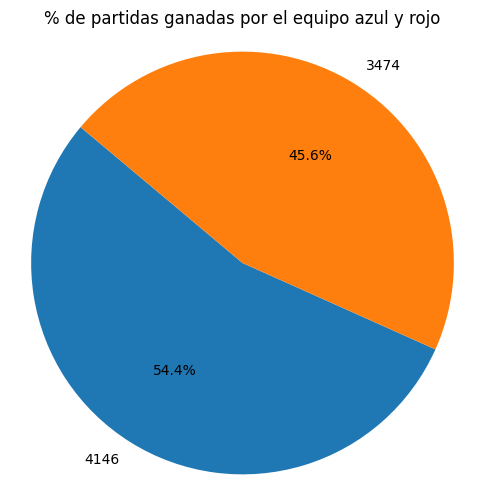

In [29]:
plt.figure(figsize=(6,6))
plt.pie(df['bResult'].value_counts(), labels=df['bResult'].value_counts(), autopct='%1.1f%%', startangle=140)
plt.title('% de partidas ganadas por el equipo azul y rojo')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('pie_chart_eq.png')
plt.show()

Observamos la correlación de las variables, donde podemos observar claramente la relaciones que tienen nuestras variables realmente. Debido a que casi todo depende del oro, podemos observar que la diferencia del oro al 15 cuando es positiva significa que esta ganando el equipo azul, por ello tiene un valor alto en relacion al oro del equipo azul y muy bajo en relacion del equipo rojo.

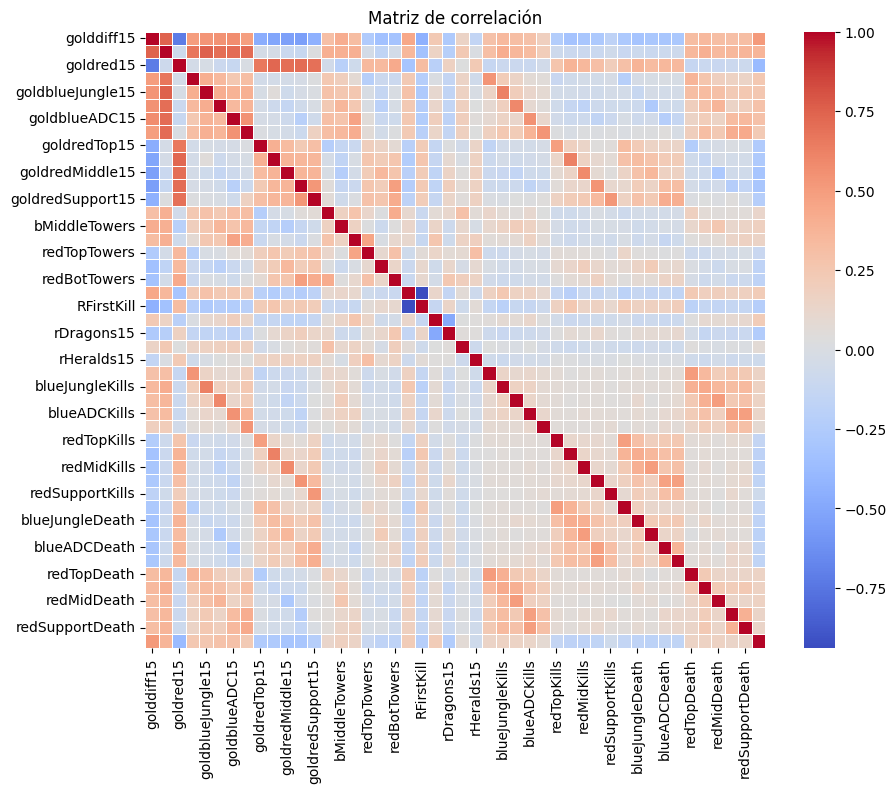

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

Podemos ve que las variables con mayor correlación son las siguientes, todas relacionadas con el oro, lo que tiene sentido

In [8]:
correlation_matrix = df.corr()

# Obtener las 5 parejas de variables con mayor correlación
top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Seleccionar las 5 primeras parejas (excluyendo las correlaciones de 1 consigo misma)
top_correlations = top_correlations[1:6]

# Extraer los nombres de las variables con mayor correlación y sus valores de correlación
top_correlation_vars = [(corr[0], corr[1], correlation_matrix.loc[corr[0], corr[1]]) for corr in top_correlations.index]

# Imprimir las 5 parejas de variables con mayor correlación y su valor de correlación
print("Las 5 parejas de variables con mayor correlación son:")
for var1, var2, corr_value in top_correlation_vars:
    print(f"{var1} y {var2}: {corr_value:.2f}")

Las 5 parejas de variables con mayor correlación son:
goldblueJungle15 y goldblue15: 0.75
goldblue15 y golddiff15: 0.75
goldredJungle15 y goldred15: 0.73
goldredADC15 y goldred15: 0.71
goldblue15 y goldblueADC15: 0.71


Y aqui las variables que menos correlación tienen, destacando la primera Kill, lo cual tiene sentido ya que es contraria o la tiene un equipo o el otro.

In [10]:
correlation_matrix = df.corr()

# Obtener las 5 parejas de variables con mayor correlación
top_correlations = correlation_matrix.unstack().sort_values(ascending=True).drop_duplicates()

# Seleccionar las 5 primeras parejas (excluyendo las correlaciones de 1 consigo misma)
top_correlations = top_correlations[:5]

# Extraer los nombres de las variables con mayor correlación y sus valores de correlación
top_correlation_vars = [(corr[0], corr[1], correlation_matrix.loc[corr[0], corr[1]]) for corr in top_correlations.index]

# Imprimir las 5 parejas de variables con mayor correlación y su valor de correlación
print("Las 5 parejas de variables con mayor correlación son:")
for var1, var2, corr_value in top_correlation_vars:
    print(f"{var1} y {var2}: {corr_value:.2f}")

Las 5 parejas de variables con mayor correlación son:
RFirstKill y BFirstKill: -0.94
golddiff15 y goldred15: -0.72
goldredADC15 y golddiff15: -0.55
goldredMiddle15 y golddiff15: -0.54
goldredJungle15 y golddiff15: -0.51


#### Dividir los datos en entrenamiento y prueba

Dividimos el dataset en test, train y val, ademas de aplicar una estandarización

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df.drop(['bResult'], axis=1) # Variables independientes
y = df['bResult'] # Variable objetivo

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, stratify=y,random_state=33)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.3, stratify=y_train,random_state=33)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

class_names = np.unique(y_train)
s_class_names = ['Red Win','Blue Win']
feature_names = X.columns.tolist()

Aqui podemos ver la distribución del dataset.

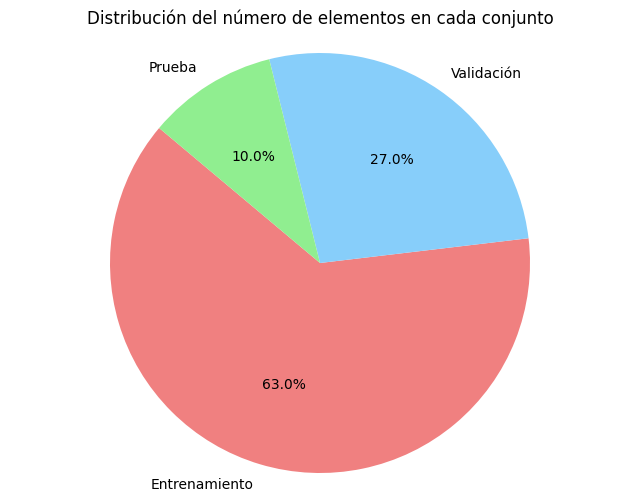

In [22]:
import matplotlib.pyplot as plt

# Número de elementos en cada conjunto
num_train = len(X_train)
num_test = len(X_test)
num_val = len(X_val)

# Etiquetas para los conjuntos
labels = ['Entrenamiento', 'Validación', 'Prueba']

# Datos para el gráfico tipo "queso"
sizes = [num_train, num_val, num_test]

# Colores para cada sección del gráfico
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

# Crear el gráfico tipo "queso"
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Añadir título
plt.title('Distribución del número de elementos en cada conjunto')

# Mostrar el gráfico
plt.axis('equal')  # Asegurar que el gráfico sea circular
plt.show()


Y que ademas hemos mantenido la representación de cada clase.

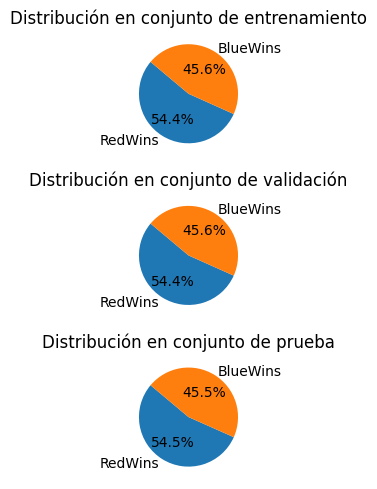

In [27]:
train_distribution = y_train.value_counts(normalize=True)
val_distribution = y_val.value_counts(normalize=True)
test_distribution = y_test.value_counts(normalize=True)

plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 1)
plt.pie(train_distribution, labels=['RedWins','BlueWins'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución en conjunto de entrenamiento')

# Crear el gráfico tipo "queso" para el conjunto de validación
plt.subplot(3, 1, 2)
plt.pie(val_distribution, labels=['RedWins','BlueWins'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución en conjunto de validación')

# Crear el gráfico tipo "queso" para el conjunto de prueba
plt.subplot(3, 1, 3)
plt.pie(test_distribution, labels=['RedWins','BlueWins'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución en conjunto de prueba')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Observamos las variables sin estandarizar

In [15]:
X_train.describe()

,golddiff15,goldblue15,goldred15,goldblueTop15,goldblueJungle15,goldblueMiddle15,goldblueADC15,goldblueSupport15,goldredTop15,goldredJungle15,...,blueTopDeath,blueJungleDeath,blueMidDeath,blueADCDeath,blueSupportDeath,redTopDeath,redJungleDeath,redMidDeath,redADCDeath,redSupportDeath
count,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,...,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,215.516667,23284.323750,23068.807083,4874.720000,4726.490417,5269.151667,5188.342708,3225.618958,4832.233333,4670.224167,...,0.605000,0.594375,0.507708,0.424375,0.554792,0.678958,0.611250,0.533750,0.437500,0.559583
std,2593.081055,1802.259438,1725.364986,552.251894,561.865251,503.756720,532.167266,391.280195,530.151378,540.638763,...,0.818249,0.783138,0.754471,0.684199,0.763786,0.869989,0.793623,0.770434,0.686434,0.762608
min,-11516.000000,17189.000000,17302.000000,3045.000000,2804.000000,3089.000000,2791.000000,2358.000000,2883.000000,3006.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1414.250000,22118.750000,21934.750000,4537.000000,4347.000000,4940.750000,4823.000000,2957.000000,4508.750000,4305.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,181.000000,23196.500000,23010.000000,4842.000000,4687.000000,5241.000000,5122.000000,3167.000000,4811.500000,4632.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1827.250000,24380.250000,24125.000000,5181.000000,5059.250000,5553.250000,5495.000000,3439.000000,5136.000000,4977.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,12081.000000,31333.000000,30353.000000,7188.000000,7306.000000,7532.000000,7867.000000,6339.000000,7890.000000,8465.000000,...,6.000000,5.000000,6.000000,5.000000,5.000000,6.000000,5.000000,6.000000,5.000000,5.000000


Creamos una función que pasado un modelo ya entrenado calcule sus metricas a evaluar

In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

def evaluate_model(model, X_test, y_test):
    # Predice en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcula la exactitud
    accuracy = model.score(X_test, y_test)
    
    # Calcula la precisión
    precision = precision_score(y_test, y_pred)
    
    # Calcula el F1-score
    f1 = f1_score(y_test, y_pred)
    
    # Aplica validación cruzada para evaluar el rendimiento del modelo
    cv_scores = cross_val_score(model, X_test, y_test, cv=5)
    
    return accuracy, precision, f1, np.mean(cv_scores)


Tambien creamos una funcion que nos pinte la matriz de confusión a partir de unos resultados

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



def make_cf(y_val, y_predfinal, model_name):

    # Definir las etiquetas de clase
    class_labels = ['Red Win', 'Blue Win']

    # Calcular la matriz de confusión
    conf_mat = confusion_matrix(y_val, y_predfinal)

    # Crear un mapa de calor de la matriz de confusión
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, yticklabels=class_labels, xticklabels=class_labels)

    # Añadir etiquetas y título
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.savefig(f'{model_name}_confusion_matrix.png')
    # Mostrar el mapa de calor
    plt.show()


In [12]:
acc_dict = {}
f1_dict = {}
exac_dict = {}
val_dict = {}

#### Naive Bayes

Empezamos con el modelo Naive Bayes, debido a que este modelo no tiene muchos parámetros a optimizar, lo unico que probaremos es entre el modelo Gaussiano y el Bernuliano, y nos quedaremos con el mejor.

In [57]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
modelos = [GaussianNB(), BernoulliNB()]
best_modelos_id=-1
best_accuracy=0
for i,model in enumerate(modelos):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    accuracy = np.mean(y_pred == y_val)
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_modelos_id=i

best_model = modelos[best_modelos_id]
best_model.fit(X_train_scaled, y_train)
accuracy, precision, f1, cv_score = evaluate_model(model, X_val, y_val)
print(f'BEST GAUSIAN NAIVE -> {modelos[best_modelos_id]}')
print("Exactitud:", accuracy)
print("Precisión:", precision)
print("F1-Score:", f1)
print("Validación Cruzada (media):", cv_score)
acc_dict['Naive Bayes'] = accuracy
val_dict['Naive Bayes'] = cv_score
exac_dict['Naive Bayes'] = accuracy
f1_dict['Naive Bayes'] =  f1

BEST GAUSIAN NAIVE -> GaussianNB()
Exactitud: 0.7215743440233237
Precisión: 0.7484105358764759
F1-Score: 0.7420081044574516
Validación Cruzada (media): 0.7254765785557367


c:\Users\luism\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  warnings.warn(
c:\Users\luism\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  warnings.warn(


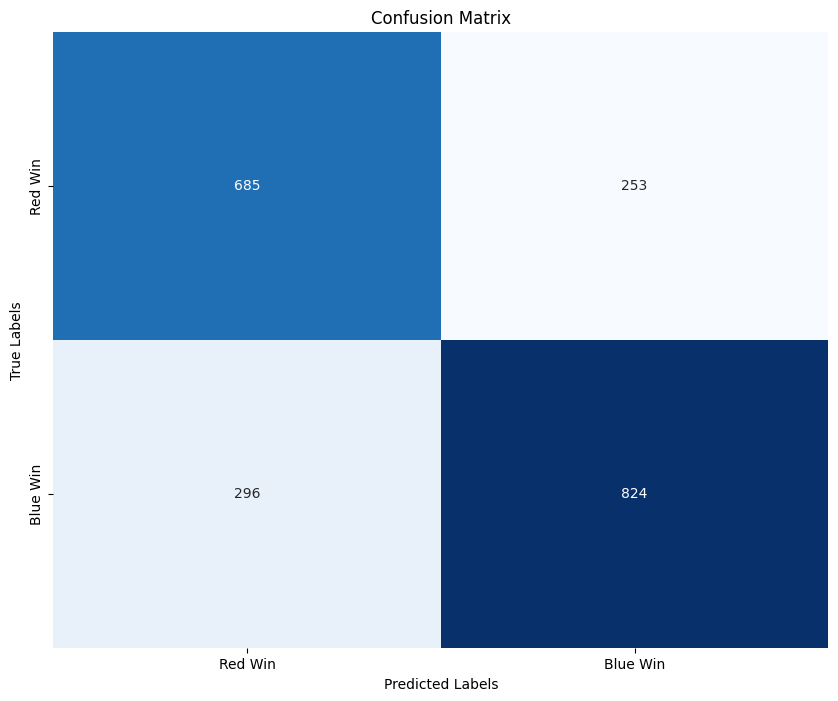

In [36]:
make_cf(y_val, y_pred, 'Naive Bayes')

#### Decision tree

FINAL TREE params:
   -MAX_DEPTH: 6
   -BEST_CRITERION: gini
Exactitud: 0.7439261418853256
Precisión: 0.7545064377682403
F1-Score: 0.7693654266958424
Validación Cruzada (media): 0.7133241206623675


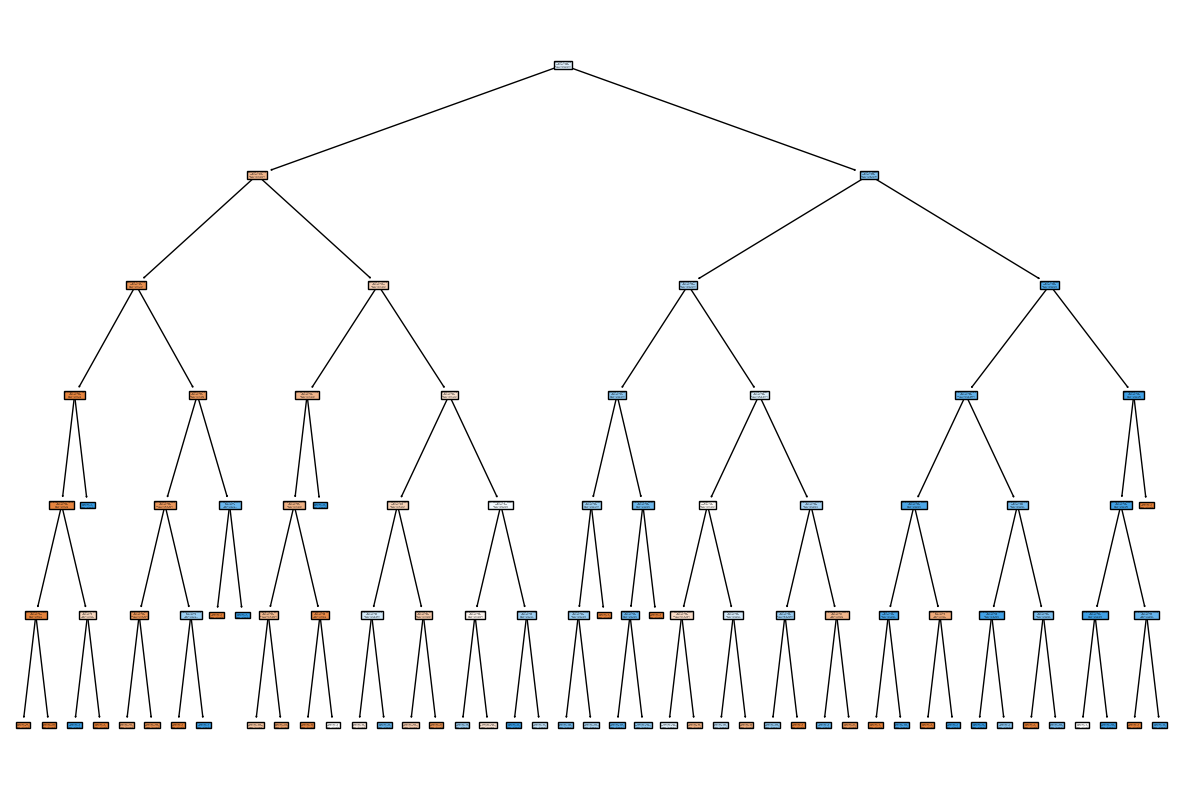

In [63]:
# Probamos con el rango de [1-15] de Max_depth y luego vemos que criterio se adapta mejor a esta depth.
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
best_depth = 0
best_accuracy = 0

for i in range(1,15):
    tree = DecisionTreeClassifier(random_state=33,max_depth=i) 
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = i

best_accuracy = 0
options = ["gini", "entropy", "log_loss"]
best_option = -1

for i,op in enumerate(options):
    tree = DecisionTreeClassifier(random_state=33,max_depth=best_depth, criterion=op) 
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_option = i


tree_final = DecisionTreeClassifier(random_state=33,max_depth=best_depth, criterion=options[best_option])
tree_final.fit(X_train, y_train)

accuracy, precision, f1, cv_score = evaluate_model(tree_final, X_val, y_val)
print(f'FINAL TREE params:\n   -MAX_DEPTH: {best_depth}\n   -BEST_CRITERION: {options[best_option]}')
print("Exactitud:", accuracy)
print("Precisión:", precision)
print("F1-Score:", f1)
print("Validación Cruzada (media):", cv_score)
acc_dict['Decision Tree'] = accuracy
val_dict['Decision Tree'] = cv_score
exac_dict['Decision Tree'] = accuracy
f1_dict['Decision Tree'] =  f1
plt.figure(figsize=(15, 10))
plot_tree(tree_final, filled=True, feature_names=feature_names, class_names=s_class_names)
plt.show()

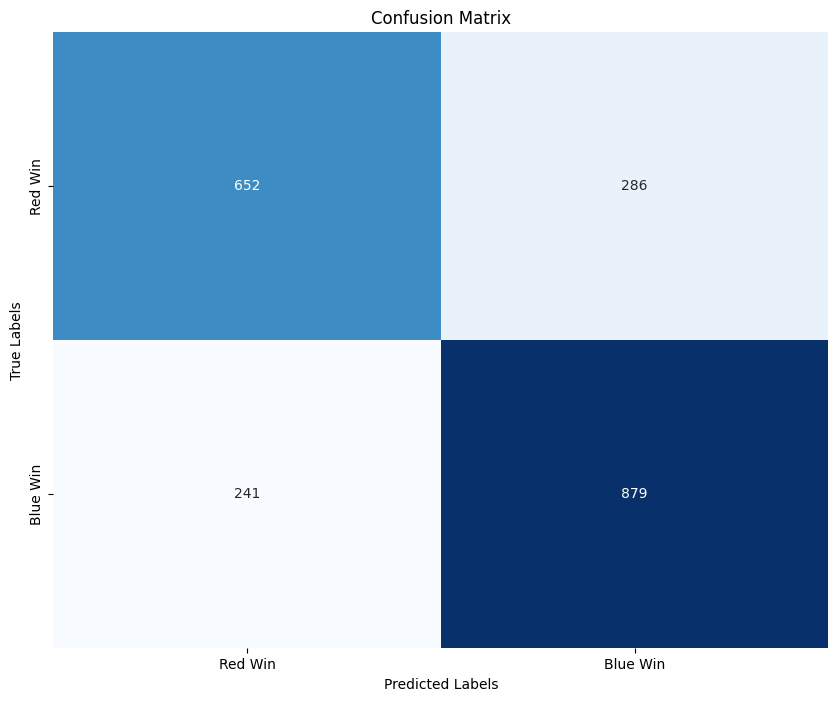

In [44]:
y_predfinal=tree_final.predict(X_val)

make_cf(y_val, y_predfinal, 'Decision Tree')

In [64]:
# Las variables mas importantes son las que mas ayudan a clasificar entre las clases.
importances1 = tree_final.feature_importances_
indices1 = np.argsort(importances1)[::-1]  # Ordenar las importancias de mayor a menor

print("Variables más importantes del árbol optimizado:")
for i, idx in enumerate(indices1):
    print(f"{i+1}. {feature_names[idx]}: {importances1[idx]}")
    if i > best_depth:
        break

Variables más importantes del árbol optimizado:
1. golddiff15: 0.8091223899469817
2. goldblueTop15: 0.0322750327917653
3. rDragons15: 0.03118062301320936
4. goldblue15: 0.02037883274531094
5. goldredJungle15: 0.012492227074840889
6. goldredTop15: 0.01243127504313674
7. goldredADC15: 0.010009902432165794
8. goldredMiddle15: 0.008665936891502754


#### K-Nearest Neighbors (KNN)

In [59]:
# Optimizamos los parámetros y nos quedamos con los óptimos
from sklearn.neighbors import KNeighborsClassifier
best_accuracy =0
best_k = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    y_pred1 = knn.predict(X_val_scaled)
    accuracy1 = accuracy_score(y_val, y_pred1)
    if accuracy1 > best_accuracy:
        best_accuracy = accuracy1
        best_k = i


best_accuracy=0
op_w = ['uniform', 'distance']
best_op_w = -1
for i,op in enumerate(op_w):
    knn = KNeighborsClassifier(n_neighbors=best_k, weights=op)
    knn.fit(X_train_scaled, y_train)
    y_pred1 = knn.predict(X_val_scaled)
    accuracy1 = accuracy_score(y_val, y_pred1)
    if accuracy1 > best_accuracy:
        best_accuracy = accuracy1
        best_op_w = i


best_accuracy=0
op_a = ['ball_tree', 'kd_tree', 'brute']
best_op_a = -1
for i,op in enumerate(op_a):
    knn = KNeighborsClassifier(n_neighbors=best_k, weights=op_w[best_op_w], algorithm=op)
    knn.fit(X_train_scaled, y_train)
    y_pred1 = knn.predict(X_val_scaled)
    accuracy1 = accuracy_score(y_val, y_pred1)
    if accuracy1 > best_accuracy:
        best_accuracy = accuracy1
        best_op_a = i

best_accuracy=0
op_m = ['minkowski', 'manhattan', 'euclidean']
best_op_m = -1
for i,op in enumerate(op_m):
    knn = KNeighborsClassifier(n_neighbors=best_k, weights=op_w[best_op_w], algorithm=op_a[best_op_a], metric=op)
    knn.fit(X_train_scaled, y_train)
    y_pred1 = knn.predict(X_val_scaled)
    accuracy1 = accuracy_score(y_val, y_pred1)
    if accuracy1 > best_accuracy:
        best_accuracy = accuracy1
        best_op_m = i


knn_final = KNeighborsClassifier(n_neighbors=best_k, weights=op_w[best_op_w], algorithm=op_a[best_op_a], metric=op_m[best_op_m])
knn_final.fit(X_train_scaled, y_train)
accuracy, precision, f1, cv_score = evaluate_model(knn_final, X_val_scaled, y_val)
print(f'FINAL KNN params:\n   -K: {best_k}\n   -BEST_WEIGHTS: {op_w[best_op_w]}\n   -BEST_ALGORITHM: {op_a[best_op_a]}\n   -BEST_METRIC: {op_m[best_op_m]}')
print("Exactitud:", accuracy)
print("Precisión:", precision)
print("F1-Score:", f1)
print("Validación Cruzada (media):", cv_score)
acc_dict['KNN'] = accuracy
val_dict['KNN'] = cv_score
exac_dict['KNN'] = accuracy
f1_dict['KNN'] =  f1

FINAL KNN params:
   -K: 8
   -BEST_WEIGHTS: uniform
   -BEST_ALGORITHM: ball_tree
   -BEST_METRIC: minkowski
Exactitud: 0.706997084548105
Precisión: 0.7473684210526316
F1-Score: 0.7214780600461894
Validación Cruzada (media): 0.6953570500555122


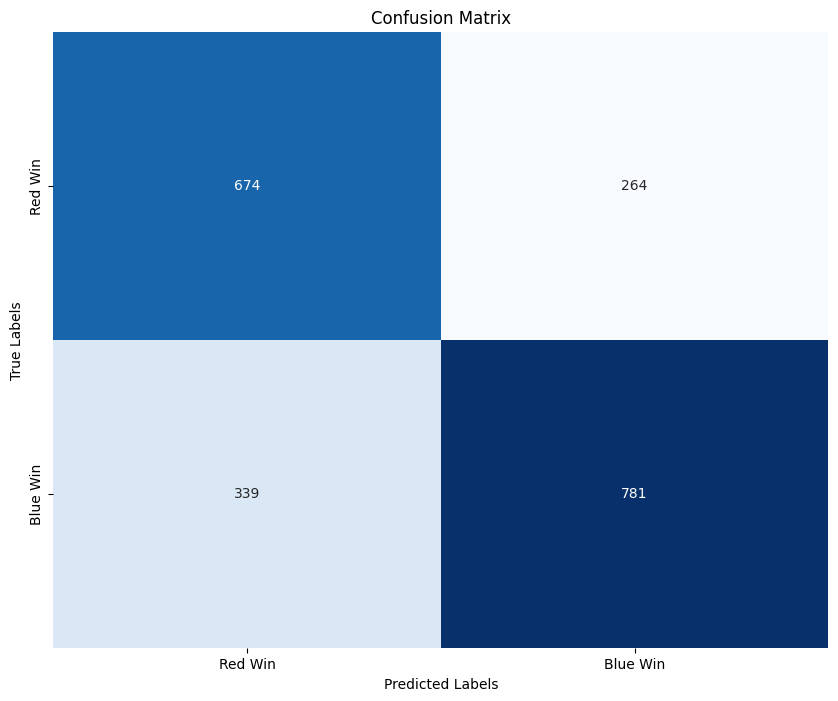

In [47]:
y_predfinal = knn_final.predict(X_val_scaled)
make_cf(y_val, y_predfinal, 'KNN')

#### Random Forest (RF)

In [60]:
from sklearn.ensemble import RandomForestClassifier
# Primero vamos a ver cuál es el valor óptimo para el n_estimators y después qué criterio es la mejor opción.
best_accuracy = 0
best_n = 0
for i in [x*50 for x in range(1,10)]:
    rf = RandomForestClassifier(n_estimators=i, random_state=33)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n = i

best_accuracy = 0
options = ["gini", "entropy",'log_loss']
best_option = -1
for i,op in enumerate(options):
    rf = RandomForestClassifier(n_estimators=best_n, random_state=33, criterion=op)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_option = i

best_accuracy=  0
best_depth = 0
for i in range(1,15):
    rf = RandomForestClassifier(n_estimators=best_n, random_state=33, criterion=options[best_option], max_depth=i)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = i

rf_final = RandomForestClassifier(n_estimators=best_n, random_state=33, criterion=options[best_option], max_depth=best_depth)
rf_final.fit(X_train, y_train)
accuracy, precision, f1, cv_score = evaluate_model(rf_final, X_val_scaled, y_val)
print(f'FINAL RANDOM FOREST params:\n   -N_ESTIMATORS: {best_n}\n   -BEST_CRITERION: {options[best_option]}\n   -MAX_DEPTH: {best_depth}')
print("Exactitud:", accuracy)
print("Precisión:", precision)
print("F1-Score:", f1)
print("Validación Cruzada (media):", cv_score)
acc_dict['Random Forest'] = accuracy
val_dict['Random Forest'] = cv_score
exac_dict['Random Forest'] = accuracy
f1_dict['Random Forest'] =  f1

c:\Users\luism\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\luism\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


FINAL RANDOM FOREST params:
   -N_ESTIMATORS: 300
   -BEST_CRITERION: gini
   -MAX_DEPTH: 12
Exactitud: 0.5456754130223518
Precisión: 0.6923076923076923
F1-Score: 0.41599000624609617
Validación Cruzada (media): 0.741027094701533


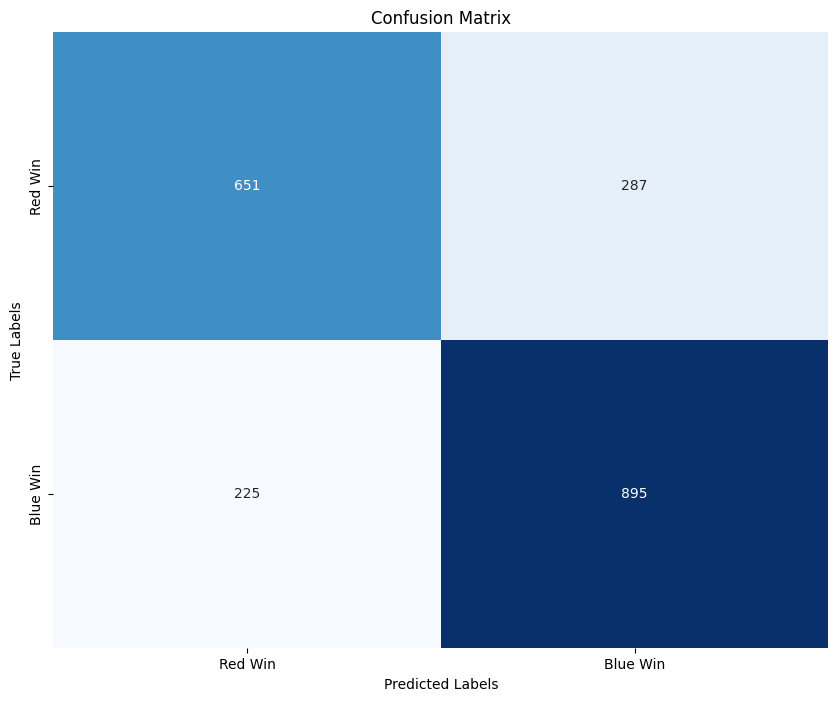

In [50]:
y_predfinal = rf_final.predict(X_val)
make_cf(y_val, y_predfinal, 'Random Forest')

#### Redes neuronales

##### Red neuronal simple

In [7]:
import tensorflow as tf

def crear_modelo_simple():
    modelo = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(len(feature_names),)),  # Capa oculta con 128 neuronas
        tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida con 1 neurona para clasificación binaria
    ])
    modelo.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
    return modelo

##### Red neuronal compleja

In [8]:
def crear_modelo_complejo():
    modelo = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(len(feature_names),)),  # Capa oculta con 256 neuronas
        tf.keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
        tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida con 1 neurona para clasificación binaria
    ])
    modelo.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
    return modelo

##### Red Neuronal compleja con dropout

In [9]:
from tensorflow.python.keras.callbacks import EarlyStopping


def crear_modelo_complejo_dropout():
    modelo = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(len(feature_names),)),  # Capa oculta con 256 neuronas
        tf.keras.layers.Dropout(0.7),  # Dropout para prevenir overfitting
        tf.keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
        tf.keras.layers.Dropout(0.7),  # Dropout para prevenir overfitting
        tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida con 1 neurona para clasificación binaria
    ])
    modelo.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
    return modelo

In [10]:
def pintar_grafica(history, epo):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epo)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

Entrenando Red Simple...


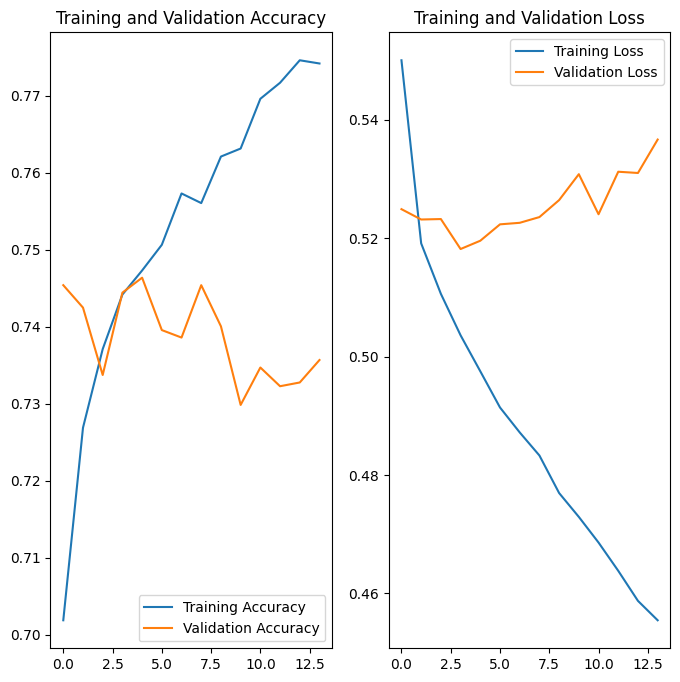

65/65 [==============================] - 0s 1ms/step
Modelo Red Simple:
Epoch: 14
Exactitud: 0.7356656948493683
Precisión: 0.7358629642862058
F1-Score: 0.7357531967881552
Entrenando Red Compleja...


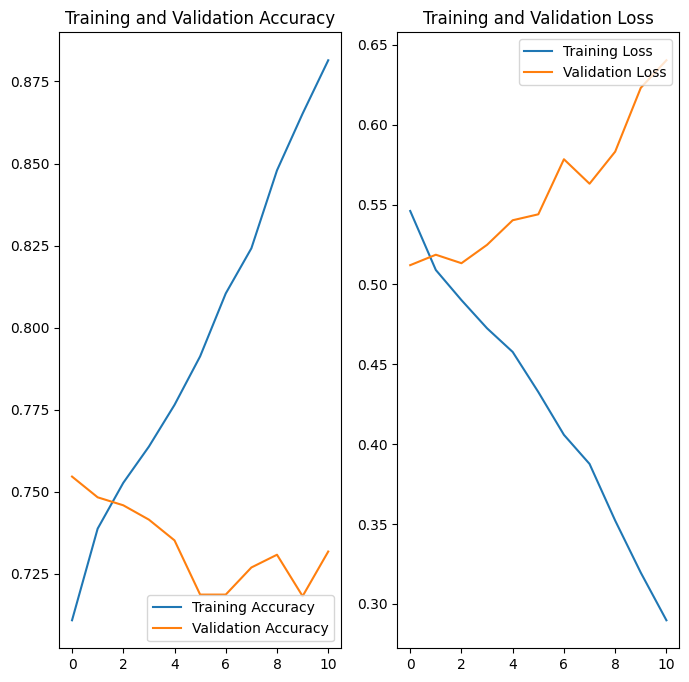

65/65 [==============================] - 0s 1ms/step
Modelo Red Compleja:
Epoch: 11
Exactitud: 0.7317784256559767
Precisión: 0.7314956606339826
F1-Score: 0.7316030601284551
Entrenando Red Compleja con Dropout...


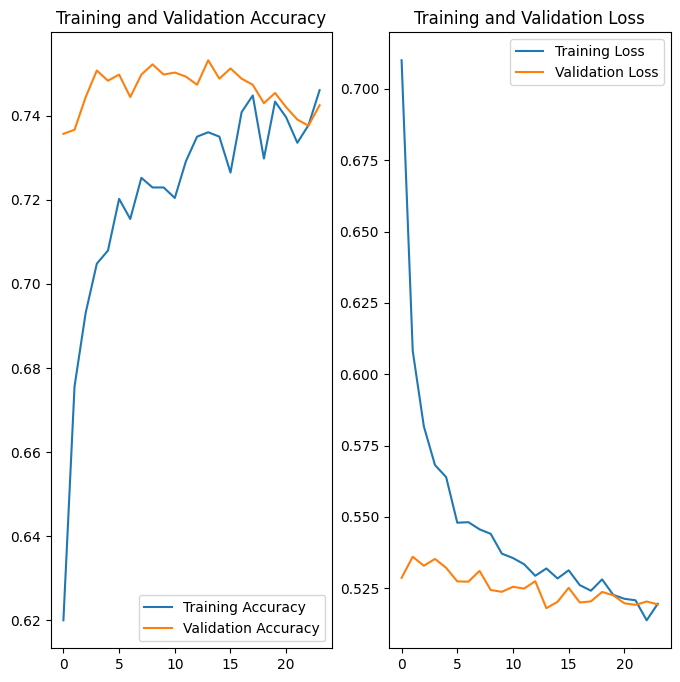

65/65 [==============================] - 0s 1ms/step
Modelo Red Compleja con Dropout:
Epoch: 24
Exactitud: 0.7424684159378037
Precisión: 0.7421852595050803
F1-Score: 0.7411300846709389

El mejor modelo es: Red Compleja con Dropout con una exactitud de 0.7424684159378037


In [13]:
# Aqui creamos 3 modelos distintos de redes neuronales y los evaluamos todos para ver sus resultados
import numpy as np
from tensorflow.python.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score

modelos = [crear_modelo_simple(), crear_modelo_complejo(), crear_modelo_complejo_dropout()]
nombres_modelos = ["Red Simple", "Red Compleja", "Red Compleja con Dropout"]

# Inicializar variables para almacenar los resultados
mejor_modelo = None
mejor_accuracy = 0.0

# Iterar sobre los modelos
for nombre, modelo in zip(nombres_modelos, modelos):
    print(f"Entrenando {nombre}...")

    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    history = modelo.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0, callbacks=[early_stopping], validation_data=(X_val_scaled, y_val))  # Entrenar el modelo
    num_epocas_early_stopping = early_stopping.stopped_epoch + 1
    pintar_grafica(history, num_epocas_early_stopping)
    # Evaluar el modelo en el conjunto de prueba
    
    y_val_pre = modelo.predict(X_val_scaled)
    y_val_pre = [1 if val > 0.5 else 0 for val in y_val_pre]

    # Calcula la exactitud
    accuracy = accuracy_score(y_val, y_val_pre)

    # Calcula la precisión
    precision = precision_score(y_val, y_val_pre, average='weighted')

    # Calcula el F1-score
    f1 = f1_score(y_val, y_val_pre, average='weighted')

    print(f"Modelo {nombre}:")
    print("Epoch:", num_epocas_early_stopping)
    print("Exactitud:", accuracy)
    print("Precisión:", precision)
    print("F1-Score:", f1)
    
    acc_dict[nombre]=accuracy
    exac_dict[nombre]=accuracy
    f1_dict[nombre]=f1
    # Actualizar el mejor modelo si es necesario
    if accuracy > mejor_accuracy:
        mejor_modelo = nombre
        mejor_accuracy = accuracy

# Imprimir el mejor modelo
print(f"\nEl mejor modelo es: {mejor_modelo} con una exactitud de {mejor_accuracy}")


 1/65 [..............................] - ETA: 1s

65/65 [==============================] - 0s 2ms/step


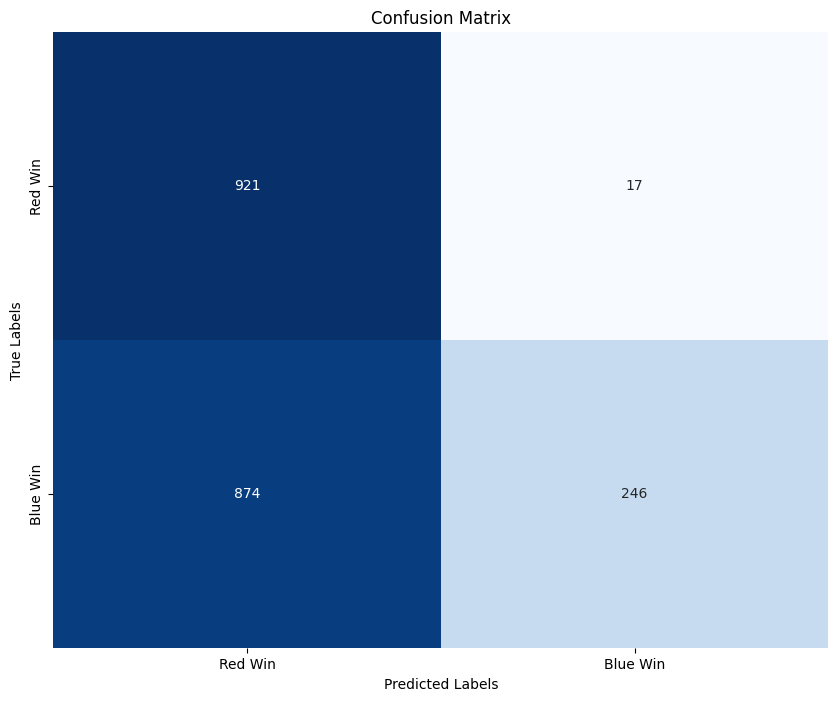

65/65 [==============================] - 0s 2ms/step


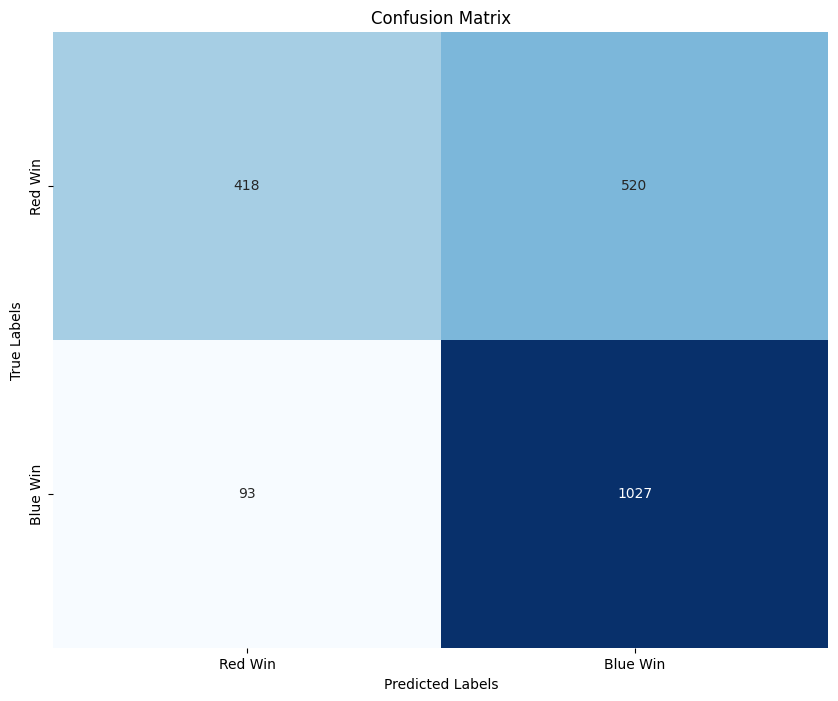

65/65 [==============================] - 0s 1ms/step


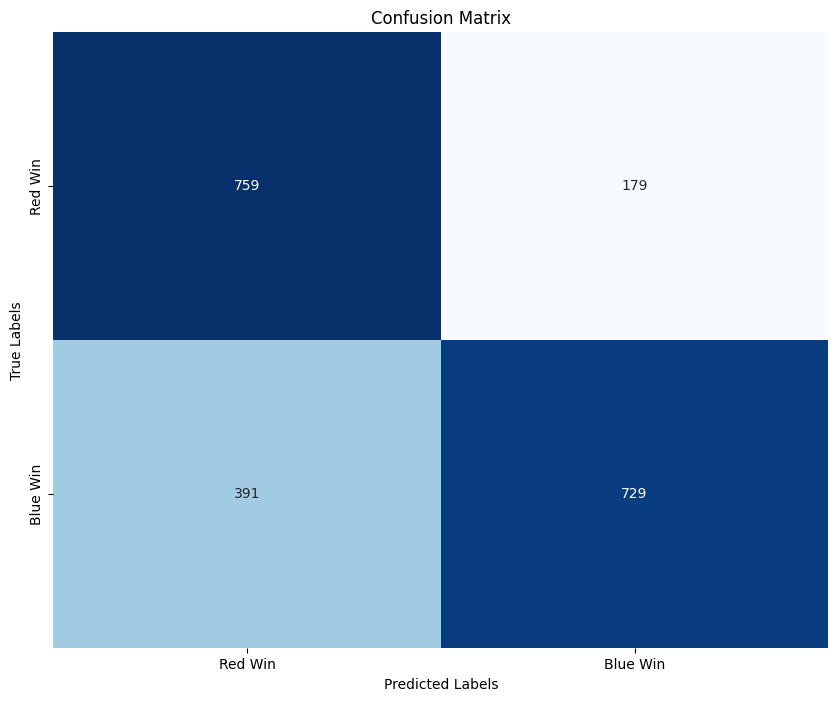

In [15]:
for nombre, modelo in zip(nombres_modelos, modelos):
    y_predfinal = modelo.predict(X_val)
    y_predfinal = [1 if val > 0.5 else 0 for val in y_predfinal]
    make_cf(y_val, y_predfinal, nombre)

### Conclusiones

In [78]:
# Cambiamos los nombres de los modelos para adaptar el gráfico general
acc_dict['RCDrop'] = acc_dict.pop('Red Compleja con Dropout')
acc_dict['RC'] = acc_dict.pop('Red Compleja')
acc_dict['RS'] = acc_dict.pop('Red Simple')
acc_dict['DT'] = acc_dict.pop('Decision Tree')
acc_dict['RF'] = acc_dict.pop('Random Forest')
acc_dict['NB'] = acc_dict.pop('Naive Bayes')



f1_dict['RCDrop'] = f1_dict.pop('Red Compleja con Dropout')
f1_dict['RC'] = f1_dict.pop('Red Compleja')
f1_dict['RS'] = f1_dict.pop('Red Simple')
f1_dict['DT'] = f1_dict.pop('Decision Tree')
f1_dict['RF'] = f1_dict.pop('Random Forest')
f1_dict['NB'] = f1_dict.pop('Naive Bayes')

exac_dict['RCDrop'] = exac_dict.pop('Red Compleja con Dropout')
exac_dict['RC'] = exac_dict.pop('Red Compleja')
exac_dict['RS'] = exac_dict.pop('Red Simple')
exac_dict['DT'] = exac_dict.pop('Decision Tree')
exac_dict['RF'] = exac_dict.pop('Random Forest')
exac_dict['NB'] = exac_dict.pop('Naive Bayes')

val_dict['DT'] = val_dict.pop('Decision Tree')
val_dict['RF'] = val_dict.pop('Random Forest')
val_dict['NB'] = val_dict.pop('Naive Bayes')

<Figure size 1000x500 with 0 Axes>

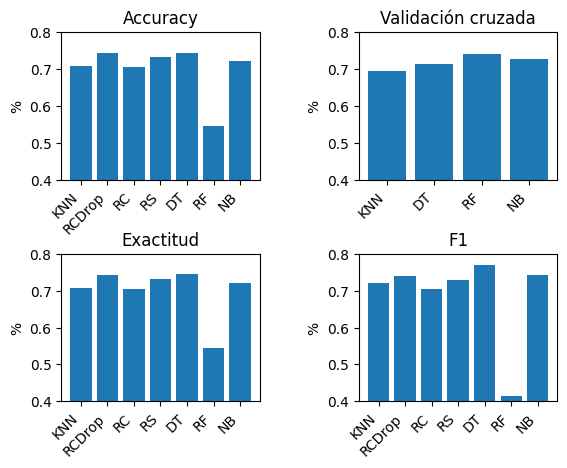

In [95]:
# Mostramos los resultados combinados de todos los modelos 
plt.figure(figsize=(10, 5))
fig, axs = plt.subplots(2, 2)


def plot_bar(dict, name_dict, pos_sub_plot):
    plt.subplot(pos_sub_plot[0], pos_sub_plot[1], pos_sub_plot[2])
    labels = list(dict.keys())
    values = list(dict.values())
    
    plt.bar(labels, values)
    
    plt.xticks(rotation=45, ha='right')
    # Añadir etiquetas
    plt.ylabel('%')
    plt.title(name_dict)
    plt.ylim(0.4, 0.8)


plot_bar(acc_dict, "Accuracy", [2, 2, 1])
plot_bar(val_dict, "Validación cruzada", [2,2,2])
plot_bar(exac_dict, "Exactitud", [2,2,3])
plot_bar(f1_dict, "F1", [2,2,4])

plt.xticks(rotation=45, ha='right')
fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

A pesar de que los resultados de el Decision Tree y la Red Compleja con Drop-Out son muy similares , nos quedamos con el Decision Tree debido a su fácil intrepretación y su naturaleza explicable. 

In [97]:
# Métricas del mejor modelo elegido ( Decision Tree )
accuracy, precision, f1, cv_score = evaluate_model(tree_final, X_test, y_test)
print(f'Mejor modelo: Decision Tree:\n   -MAX_DEPTH: {best_depth}\n   -BEST_CRITERION: {options[best_option]}')
print("Exactitud:", accuracy)
print("Precisión:", precision)
print("F1-Score:", f1)
print("Validación Cruzada (media):", cv_score)

Mejor modelo: Decision Tree:
   -MAX_DEPTH: 12
   -BEST_CRITERION: gini
Exactitud: 0.7244094488188977
Precisión: 0.7345537757437071
F1-Score: 0.7535211267605634
Validación Cruzada (media): 0.6785087719298245
